<a href="https://colab.research.google.com/github/Giraldo0712/TAM_2025_2/blob/main/Introduction_Recurrent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de secuencias con redes neuronales recurrentes

- En general, muchos problemas en ciencia de datos, requieren del procesado de datos sencuenciales, generalmente asociados al tiempo (series de tiempo).

- En ese sentido, sea la serie de datos $\{x_t\in\mathbb{R}\}_{t=1}^T$.

- Suponga que se define el modelo predictivo probabilístico de la forma:

$$x_t \sim P(x_t|x_{t-1},\dots,x_1)$$

- En general, el estudio de datos secuenciales se puede atacar desde dos aproximaciones básicas: i) modelos autorregresivos , y ii) modelos autorregresivos de variable latente.

# Modelos autorregresivos

- Dichos modelos fijan una dependencia temporal de orden $\tau$.

- Por ende, el número de puntos requeridos para realizar predicciones para $t > \tau$ se mantiene fijo, dado que se asume:

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

# Modelos autorregresivos de variable latente

- Buscan preservar alguna representación latente (memoría) $h_t$ de las observaciones pasadas, y busca actualizar (predecir) la secuencia $x_t$ y la variable latente $h_t$, de la forma:

$$\hat{x}_t = P(x_t|h_t)$$

$$h_t = g(h_{t-1},x_{t-1})$$

![autorregresivo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/autorregresivo.png?raw=1)

**Nota**: $h_t$ no es observable (latente), por ende debe estimarse desde los datos.

- En estadística, el concepto de dinámica que no cambia (patrón regular) se conoce como estacionario. En este sentido, podemos tener un estimado de la secuencia completa utilizando un modelo probabilístico de la forma:

$$P(x_1,x_2,\dots,x_T) = \prod^T_{t=1}P(x_t|x_{t-1},\dots,x_1)$$
donde el estimado de la probabilidad condicional se puede realizar mediante regresores o clasficadores para eventos continuos o discretos, respectivamente.



# Modelos Markovianos

- En los modelos autorregresivos la estimación de $x_t$ se basa en una ventana de tamaño $\tau$, de la forma $x_{t-1},\dots,x_{t-\tau}$.

- Para cuando dicha aproximación es correcta, se dice que la secuencia de datos cumple con la condición Markoviana.

- Para $\tau=1$, se tiene un modelo de Markov de primer orden:

$$P(x_1,x_2,\dots,x_T)=\prod_{t=1}^T P(x_t|x_{t-1})$$
con $P(x_1|x_0)=P(x_1).$





# Ejercicio 1:

- Consultar el modelo y principio de optimización de los modelos de media móvil ([Moving average - MA](https://en.wikipedia.org/wiki/Moving-average_model)), autorregresivos de media móvil ([Autorregresive moving average - ARMA](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model)) y autorregresivo integrado de media móvil ([Autoregressive integrated moving average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)). Cuáles son sus relaciones con los modelos Markovianos?.

# 1. Contexto general

Los modelos **MA, ARMA y ARIMA** son modelos estadísticos clásicos para series de tiempo, anteriores a las redes neuronales.

Su objetivo es predecir el valor futuro de una variable (por ejemplo, temperatura, ventas, señal de audio) a partir de los valores pasados y errores previos.

En forma general, todos ellos describen una serie temporal $y_t$ como una combinación de:

- Sus **valores pasados** (parte autorregresiva o AR)
- Los **errores pasados** (parte de media móvil o MA)
- Y, en algunos casos, la **tendencia o diferencia** de la serie (parte I, de integrada)

---

# 2. Modelo MA (Moving Average)

## Definición:

El modelo de media móvil de orden q, denotado como **MA(q)**, expresa que el valor actual depende de los errores aleatorios pasados:

$$y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}$$

Donde:

- **$y_t$**: valor actual de la serie
- **$\mu$**: media (constante)
- **$\varepsilon_t$**: error aleatorio en el tiempo t (ruido blanco)
- **$\theta_i$**: coeficientes del modelo

 En palabras simples: el valor actual depende de los errores recientes (cómo se ha "equivocado" el modelo antes).

---

# 3. Modelo ARMA (Autoregressive Moving Average)

## Definición:

Combina la parte **AR** (autorregresiva) y la parte **MA** (media móvil):

$$y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-q}$$

Donde:

- La parte **AR(p)** usa valores pasados de la serie $y_{t-i}$
- La parte **MA(q)** usa errores pasados $\varepsilon_{t-i}$
- **$c$** es una constante

 En resumen: el modelo usa tanto los valores anteriores como los errores previos para hacer predicciones.

---

# 4. Modelo ARIMA (Autoregressive Integrated Moving Average)

## Definición:

El modelo **ARIMA(p, d, q)** añade el componente **I** (integrado), que significa que antes de aplicar ARMA, se diferencia la serie **d veces** para eliminar tendencia o no estacionariedad.

$$(1-B)^d y_t = c + \sum_{i=1}^{p} \phi_i (1-B)^d y_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \varepsilon_t$$

Donde **$B$** es el operador de rezago ($By_t = y_{t-1}$).

 En palabras simples:
El modelo ARIMA se usa cuando los datos tienen tendencia o no son estacionarios, y ARMA se aplica sobre la versión diferenciada de la serie.

---

# 5. Principio de optimización

El objetivo en todos estos modelos es encontrar los parámetros óptimos ($\phi_i, \theta_i, c$) que minimicen el error de predicción.

El principio de optimización más común es:

$$\min_{\phi_i, \theta_i} \text{SSE} = \sum_t (y_t - \hat{y}_t)^2$$

Es decir, minimizar la suma de los errores cuadrados entre los valores reales $y_t$ y los valores predichos $\hat{y}_t$.

 En la práctica, esto se hace con métodos como:

- **Máxima verosimilitud** (Maximum Likelihood Estimation)
- **Optimización numérica** (ej. algoritmo de Newton-Raphson, BFGS, etc.)

---

#  6. Relación con los modelos Markovianos

Aquí está la conexión interesante

Los modelos Markovianos (como las cadenas de Markov) asumen que:

> "El estado actual depende solo del estado anterior, no de los anteriores a ese"

$$P(y_t \mid y_{t-1}, y_{t-2}, \ldots) = P(y_t \mid y_{t-1})$$

##  Similitudes:

- Los modelos **AR(p)** también dependen de un número limitado de pasos pasados ($y_{t-1}, y_{t-2}, \ldots, y_{t-p}$)
- → Esto es una extensión del principio Markoviano, pero con memoria de orden p (Markov de orden p)
- Ambos describen dependencias temporales locales

##  Diferencias:

- En un modelo Markoviano, la variable siguiente depende solo del estado, no del ruido
- En ARMA/ARIMA, la predicción depende tanto del estado pasado (AR) como del error pasado (MA), lo cual agrega una componente estocástica adicional

Por eso se dice que los modelos ARMA/ARIMA son **procesos estocásticos lineales de tipo Markoviano de orden superior**.

---

#  7. Conexión con RNN

Las RNN pueden verse como una extensión no lineal y más flexible de los modelos AR o ARMA:

| Modelo | Tipo de dependencia | Naturaleza | Capacidad |
|--------|---------------------|------------|-----------|
| **AR/MA/ARIMA** | Lineal | Basada en estadísticas | Limitada (lineal y pocos pasos) |
| **RNN** | No lineal | Basada en aprendizaje | Amplia (puede recordar patrones largos) |

En resumen:

- Los modelos **ARMA/ARIMA** capturan dependencias lineales de corto plazo
- Las **RNN** capturan dependencias no lineales y de largo plazo (por eso se usan en lenguaje, voz, video, etc.)

# Redes neuronales recurrentes - Recurrent neural networks (RNN)

- Hasta el momento hemos trabajado con datos estructurados tipo tabla, en donde las muestras se asumen independientes e identicamente distribuidas (i.i.d.).

- Sin embargo, para datos secuenciales, la suposición i.i.d no es apropiada, y se requiren de arquitecturas que codifiquen dicha secuencialidad.

- Por ejemplo, en el caso de datos tipo imagen, la relación espacial debe ser codificada apropiadamente, como en el caso de las arquitecturas convolucionales ([Convolutional Neural Networks](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)).

- En este sentido, las RNN pretenden explotar la codificación mediante variables latentes, para aproximar el modelado de la incertidumbre de la secuencia como:


$$P(x_t|x_{t-1},\dots,x_1)\approx P(x_t|h_{t-1})$$

donde el estado oculto $h_{t-1}$ (hidden state) codifica la información relevante de la secuencia hasta $t-1$.

- Además, el estado oculto en $t$ se puede calcular a partir de $x_t$ y $h_{t-1},$ como:

$$h_t=f(x_t,h_{t-1})$$

**Nota**: se podría utilizar como $h_t$ todo el vector de datos $x_t,x_{t-1},\dots,x_1$; no obstante, el costo computacional y de memoría sería muy alto.

## Las RNN son redes neuronales con estados ocultos!

- Considere una matriz (mini-lote) de $P$ características desde datos secuenciales $\mathbf{X}_t\in\mathbb{R}^{N\times P}$, es decir, tenemos $N$ trayectorias con $P$ mediciones de una secuencia en el instante $t$.

- Sea $\mathbf{H}_t\in\mathbb{R}^{N \times h}$ la variable oculta (latente) para el instante $t$, la estimación de dicha variable respecto a la entrada actual y a la variable oculta en $t-1$ se puede modelar mediante RNN como:

$$\mathbf{H}_t = \phi(\mathbf{X}_t \mathbf{W}+\mathbf{H}_{t-1}\mathbf{S} + \mathbf{b}),$$

donde $\mathbf{W}\in\mathbb{R}^{P \times h},$ $\mathbf{S}\in\mathbb{R}^{h \times h},$ $\mathbf{b}\in\mathbb{R}^{h}$ y $\phi(\cdot)$ es una función de activación no lineal.

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto de la forma:

$$\mathbf{O}_t = \mathbf{H}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$

**Esquema de una RNN con un estado oculto:**

![rnn](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn.png?raw=1)



- A continuación se presenta algunos ejemplos sobre Tensorflow para RNN.

In [3]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
#-------------------------------------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
#
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#-------------------------------------------------------------------------------

Generamos el conjunto de series de tiempo a analizar

In [4]:
#-------------------------------------------------------------------------------
# definimos función para generar señales 1D-------------------------------------
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time   = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)
#-------------------------------------------------------------------------------

In [5]:
#-------------------------------------------------------------------------------
# definimos número de steps y batch_size----------------------------------------
n_steps    = 50
batch_size = 10000
#-------------------------------------------------------------------------------
series           = generate_time_series(batch_size, n_steps + 1)
print('Series dimension:',series.shape)
#-------------------------------------------------------------------------------
# partimos en conjuntos de train/valid/test-------------------------------------
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, y_train.shape)
print('Valid dimensions:',X_valid.shape, y_valid.shape)
print('Test dimensions:',X_test.shape, y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 51, 1)
Train dimensions: (7000, 50, 1) (7000, 1)
Valid dimensions: (2000, 50, 1) (2000, 1)
Test dimensions: (1000, 50, 1) (1000, 1)


$[y_{t+P},\dots,y_{t}] = f(y_{t-1},\dots,y_{t-\tau},x_{t},x_{t-1},\dots,x_{t-\tau})$

In [6]:
#-------------------------------------------------------------------------------
y_train # vector de salida
#-------------------------------------------------------------------------------

array([[-0.35489398],
       [ 0.11629631],
       [-0.35395944],
       ...,
       [ 0.04946356],
       [-0.26231018],
       [ 0.60062087]], dtype=float32)

Generamos la gráfica de las series de tiempo creadas

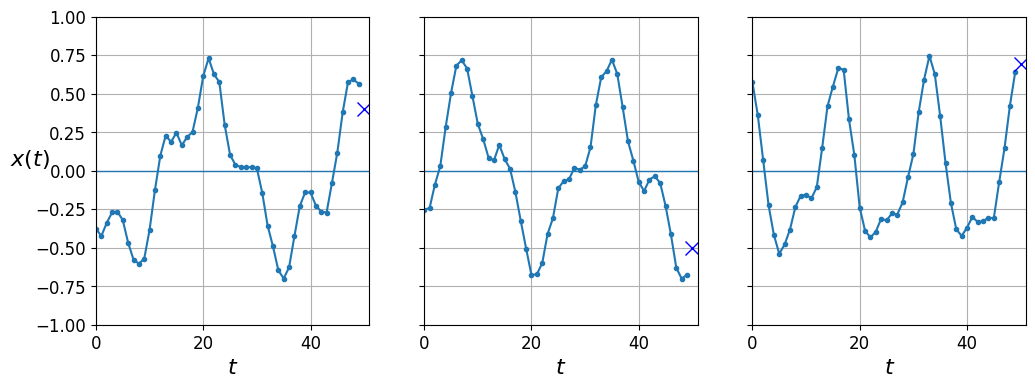

In [7]:
#-------------------------------------------------------------------------------
# definimos función para graficar las series------------------------------------
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
#-------------------------------------------------------------------------------
# graficamos 3 series del set validation----------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()
#-------------------------------------------------------------------------------

# Predicción ingenua (solo predecir el último valor):

- Para ilustrar el concepto de secuencialidad, utilizaremos un predictor ingenuo, en donde la salida actual sería igual al valor en el instante anterior:

$$x_t = x_{t-1}$$

In [8]:
#-------------------------------------------------------------------------------
# asumimos que el valor ha estimar es el último elemento de la serie----------------
y_pred = X_test[:, -1]
#-------------------------------------------------------------------------------
# calculamos el MSE entre el y_valid vs. y_pred---------------------------------

print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

MSE: 2.1811275 %


- El error cálculado no es tan grande aparentemente.

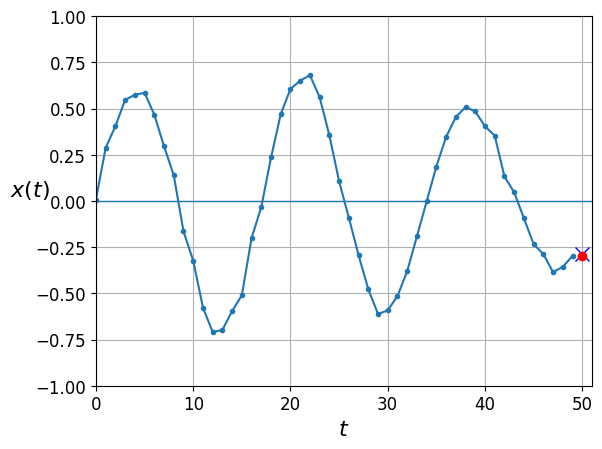

In [9]:
#-------------------------------------------------------------------------------
# graficamos valor estimado----------------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicción lineal

- Ahora utilizaremos un modelo lineal simple.

- Recuerde que como generamos ventanas, podrimos entender esta aproximación como un modelo autorregresivo simple (sin variables latentes):

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

donde la estimación de la condicional se realiza mediante un regresor con capas densas.



$\mathbf{X}=[\mathbf{x}_n]\in \mathbb{R}^{N \times P}$

$\mathbf{x}_n =[y_{n-1},y_{n-2},\dots, y_{n-\tau}]$

$\mathbf{y}\in \mathbb{R}^T$

$f(\mathbf{x}_n)=\mathbf{x}_n\mathbf{w}=x_{n1}w_1+\dots+x_{nP}w_P$

$f(\mathbf{x}_n)= y_{n-1}w_1+\dots+y_{n-\tau}w_P = \hat{y}_n$

$P = \tau$

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

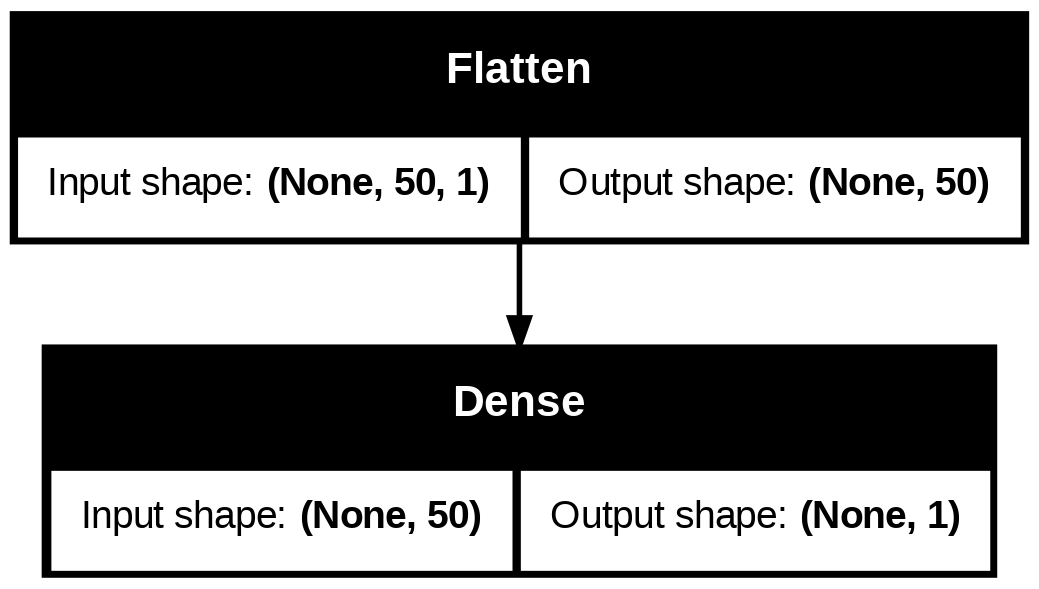

In [10]:
#-------------------------------------------------------------------------------
# definimos un modelo secuencial------------------------------------------------
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
#-------------------------------------------------------------------------------
model.summary()
#-------------------------------------------------------------------------------
keras.utils.plot_model(model, "my_model_series.png", show_shapes=True)
#-------------------------------------------------------------------------------

Compilamos y ajustamos el modelo usando los datos de train y validation

In [11]:
epochs = 20
#-------------------------------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1001 - val_loss: 0.0333
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0268 - val_loss: 0.0145
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0130 - val_loss: 0.0093
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0088 - val_loss: 0.0077
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0073 - val_loss: 0.0070
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [12]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MSE: 0.3786474 %


El resultado es mucho mejor que el predictor ingenuo.

Graficamos el desempeño del modelo secuencial

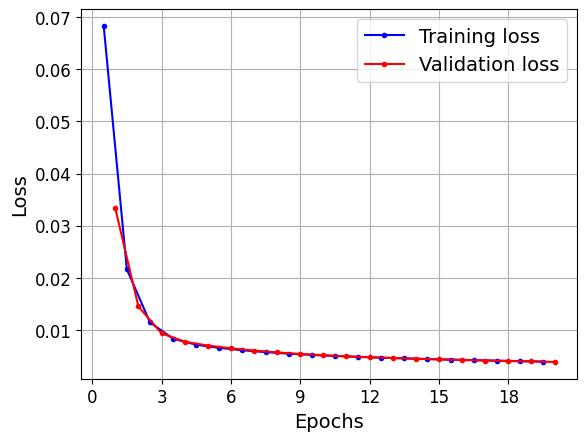

In [13]:
#-------------------------------------------------------------------------------
# definimos una función para plot de curvas de aprendizaje----------------------
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
#-------------------------------------------------------------------------------
# llamamos función de plot------------------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

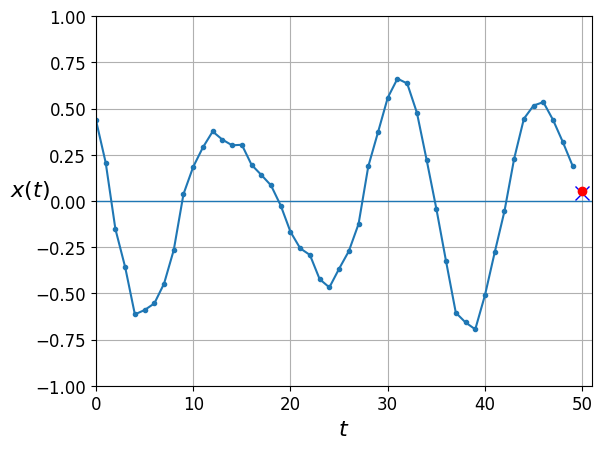

In [14]:
#-------------------------------------------------------------------------------
# pintamos series y predicciones------------------------------------------------
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicciones con RNN

- Keras tiene implementado las [capas simples de RNN](https://keras.io/api/layers/recurrent_layers/simple_rnn/).

- Por defecto la activación no lineal utilizada es la `tanh`, aunque se puede trabajar con las vistas en módulos anteriores.

- En este caso se define una única capa RNN con una neurona, dado que tenemos una única salida a predecir.

In [15]:
#-------------------------------------------------------------------------------
# definimos modelo secuencial de RNN simple-------------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1], )
])
#-------------------------------------------------------------------------------
# compilamos el modelo RNN------------------------------------------------------
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
#-------------------------------------------------------------------------------
# entrenamos el modelo y lo ajustamos con los datos de valid--------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1554 - val_loss: 0.0684
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0474 - val_loss: 0.0159
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - val_loss: 0.0123
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - val_loss: 0.0113
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

In [16]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
MSE: 1.1326264 %


Graficamos el performance de la Simple RNN

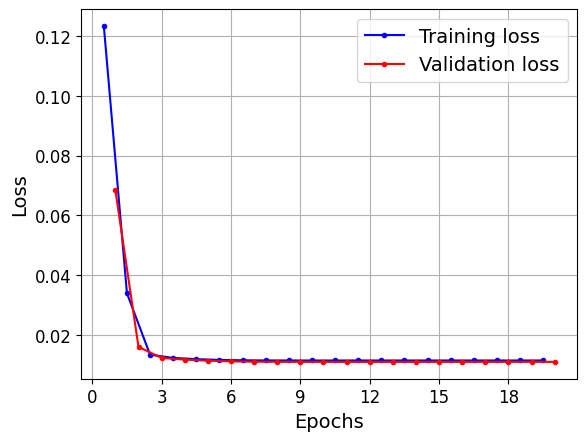

In [17]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

Se analiza la predicción

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


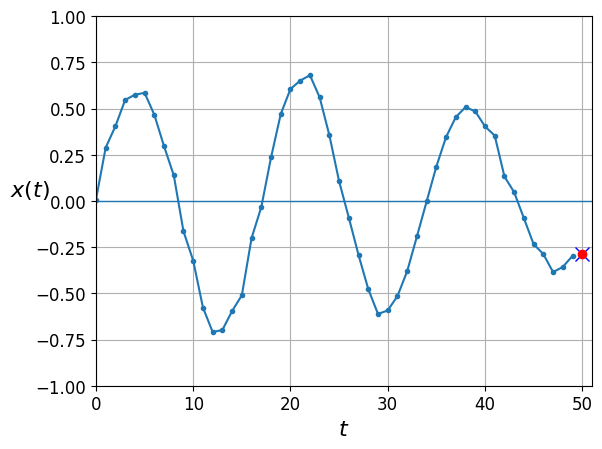

In [18]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_test)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Deep RNNs

- Un modelo profundo de RNN contiene $L$ capas ocultas.

- Sobre cada capa oculta, el estado oculto es actualizado y se pasa al siguiente instante de tiempo de la capa actual y de la capa siguiente:

![deeprnn](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/deeprnn.png?raw=1)

- El modelo recurrente profundo se define entonces como:

$$\mathbf{H}^{(l)}_t = \phi_l\left(\mathbf{H}^{(l-1)}_t \mathbf{W}^{(l)}+\mathbf{H}^{(l)}_{t-1}\mathbf{S}^{(l)} + \mathbf{b}^{(l)}\right),$$

donde $\mathbf{W}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_l},$ $\mathbf{S}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_{l-1}},$ $\mathbf{b}\in\mathbb{R}^{h_l}$ y $\phi_l(\cdot)$ es una función de activación no lineal. $\mathbf{H}^{(0)}_t=\mathbf{X}_t$

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto en la capa oculta $L$:

$$\mathbf{O}_t = \mathbf{H}^{(L)}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h_L\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$


**Nota:** para aplicar la capa densa de la salida, se puede utilizar una capa `SimpleRNN(1)` con una neurona, o una capa densa aplicada desde la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para preservar la temporalidad de los datos.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, None, 20)       │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, None, 20)       │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282 (5.01 KB)

 Trainable params: 1,282 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

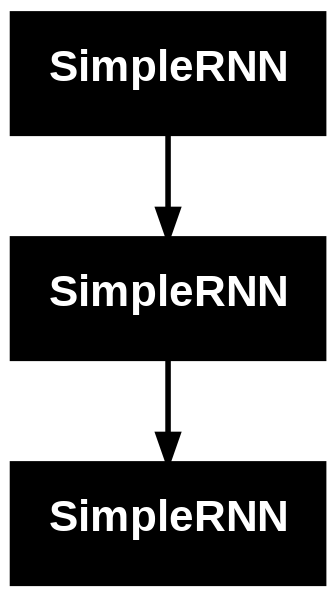

In [19]:
#-------------------------------------------------------------------------------
# definimos el modelo Deep RNN como un stack de SimpleRNN-----------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1,activation='linear')
    ])
#-------------------------------------------------------------------------------
# pintamos el diagrama de bloques del modelo
model.summary()
tf.keras.utils.plot_model(model)
#-------------------------------------------------------------------------------

# Ejercicio 2

- Para el modelo definido, determine los tamaños de las matrices y vectores de bias en cada capa.

**Nota**: Utilice el método `model.layers[l].get_weights()`

In [20]:
#Solucion ejercicio #2
for l, layer in enumerate(model.layers):
    W, U, b = layer.get_weights()
    print(f"Capa {l}:")
    print(f"  W.shape = {W.shape}")
    print(f"  U.shape = {U.shape}")
    print(f"  b.shape = {b.shape}\n")


Capa 0:
  W.shape = (1, 20)
  U.shape = (20, 20)
  b.shape = (20,)

Capa 1:
  W.shape = (20, 20)
  U.shape = (20, 20)
  b.shape = (20,)

Capa 2:
  W.shape = (20, 1)
  U.shape = (1, 1)
  b.shape = (1,)



In [21]:
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.0532 - val_loss: 0.0052
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━

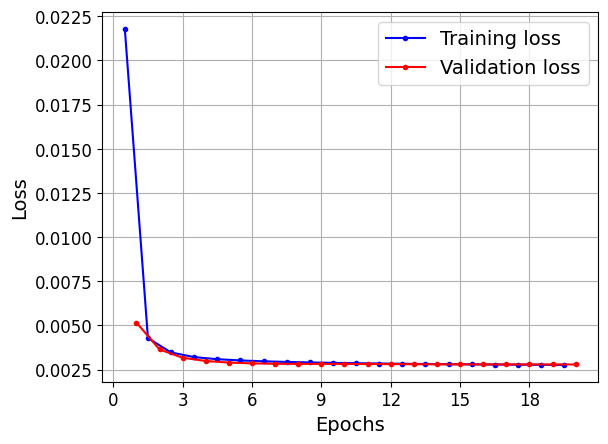

In [22]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [23]:
y_train.shape

(7000, 1)

In [24]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
#print('MSE:',np.mean(keras.losses.mean_squared_error(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------
y_pred.shape

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


(1000, 1)

Graficamos el performance de la Deep RNN

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


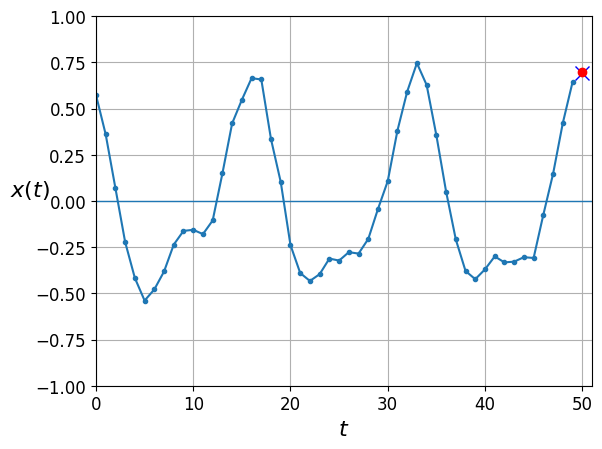

In [25]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_valid)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_valid[2, :, 0], y_valid[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicir un horizonte más lejano

- Si concatenamos las predicciones de a una muestra, para generar salidas con horizontes más lejanos, podemos estar propangando el error!

In [26]:
#-------------------------------------------------------------------------------
# definimos nueva semilla aleatoria---------------------------------------------
np.random.seed(43) #
#-------------------------------------------------------------------------------
# generamos nueva series de tiempo----------------------------------------------
series       = generate_time_series(1, n_steps + 10)     # horizonte de 10 valores en el tiempo
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X            = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
Y_pred = X[:, n_steps:]
#-------------------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [27]:
#-------------------------------------------------------------------------------
# observamos nuevas dimensiones de Y_pred---------------------------------------
Y_pred.shape #horizonte de 10 valores en el tiempo
#-------------------------------------------------------------------------------

(1, 10, 1)

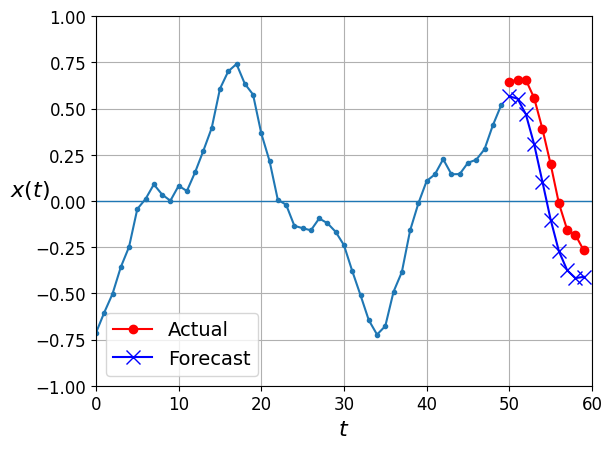

In [28]:
#-------------------------------------------------------------------------------
# definimos función para pintar forecast----------------------------------------
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)
#-------------------------------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- Lo mejor es entrenar un modelo que incluya como salida target los siguientes $T$ valores a predicir en el horizonte.

- Se requiere entonces generar nuevamente la secuencia con $T-1$ pasos más en el tiempo.

In [29]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
print('Series dimension:',series.shape)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, Y_train.shape)
print('Valid dimensions:',X_valid.shape, Y_valid.shape)
print('Test dimensions:',X_test.shape, Y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 60, 1)
Train dimensions: (7000, 50, 1) (7000, 10)
Valid dimensions: (2000, 50, 1) (2000, 10)
Test dimensions: (1000, 50, 1) (1000, 10)


Predicción de los siguientes 10 valores (uno a uno y concatenar):

In [30]:
#-------------------------------------------------------------------------------
# realizamos predicción usando modelo Deep RNN----------------------------------
del X
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
# obtenemos las predicciones de los siguientes 10 valores-----------------------
Y_pred = X[:, n_steps:, 0]
#-------------------------------------------------------------------------------
print('Y_pred dimensions:', Y_pred.shape)
#-------------------------------------------------------------------------------

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Y_pred dimensions: (2000, 10)


- Error de predicción con horizontes mayores a 1 concatenando salidas:

In [31]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_valid, Y_pred))*100,'%')
#-------------------------------------------------------------------------------

3.166167 %


Ahora se crea una RNN que permita predecir los siguientes 10 valores en una sola evaluación (predicción multi-salida):

In [32]:
#-------------------------------------------------------------------------------
# definimos semillas aleatorias-------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
# definimos el modelo secuencial multi-salida-----------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10) # capa densa para estimar los siguientes 10 valores
])
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.1302 - val_loss: 0.0264
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0245 - val_loss: 0.0178
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0171 - val_loss: 0.0144
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0138 - val_loss: 0.0132
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0125 - val_loss: 0.0114
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0115 - val_loss: 0.0106
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0109 - val_loss: 0.0102
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0096 - val_loss: 0.0098
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss

In [33]:
#-------------------------------------------------------------------------------
# generamos nuevos datos, con nueva semilla aleatoria---------------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva serie de tiempo-----------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
#-------------------------------------------------------------------------------
print('X_new dimensions:',X_new.shape)
print('Y_new dimensions:',Y_new.shape)
#-------------------------------------------------------------------------------
# hacemos predicción de los 10 últimos valores----------------------------------
Y_pred       = model.predict(X_new)[..., np.newaxis]
print('Y_pred dimensions:',Y_pred.shape)
#-------------------------------------------------------------------------------

X_new dimensions: (1, 50, 1)
Y_new dimensions: (1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step
Y_pred dimensions: (1, 10, 1)


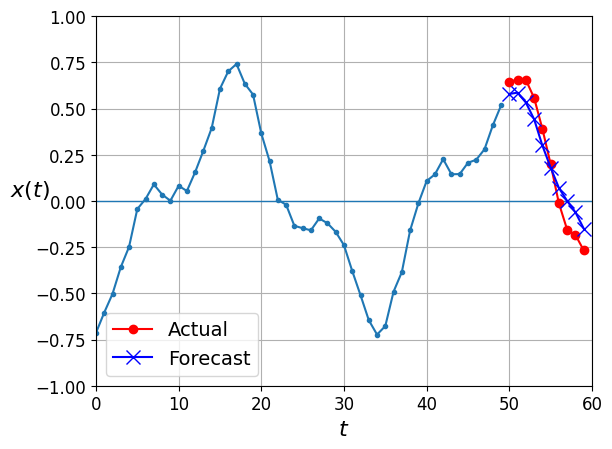

In [34]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- El error de predicción mejora:

In [35]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

1.0642551 %


# El problema de las dependencias a largo plazo

- Uno de los atractivos de los RNN es la idea de conectar la información anterior a la tarea actual. Si los RNN pudieran hacer esto, serían extremadamente útiles.

- A veces, solo necesitamos mirar información reciente para realizar la tarea actual.

- Por ejemplo, considere un modelo de lenguaje que intenta predecir la siguiente palabra basándose en las anteriores. Si estamos tratando de predecir la última palabra en la oración:

 "las nubes están en el cielo",

no necesitamos ningún contexto adicional; es bastante obvio que la siguiente palabra será **cielo**.

- En tales casos, donde la brecha entre la información relevante y el lugar que se necesita es pequeña, los RNN pueden aprender a usar la información del pasado.

![rnn_corto](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn_corto.png?raw=1)

- Pero también hay casos en los que necesitamos más contexto. Considere intentar predecir la última palabra del texto:

"Crecí en Francia ... hablo francés con fluidez",

la información reciente sugiere que la siguiente palabra es probablemente el **nombre de un idioma**, pero si queremos delimitar qué idioma, necesitamos el contexto de Francia, desde más atrás.

- Entonces, la brecha entre la información relevante y el punto donde se necesita puede ser grande.

![rnn_largo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn_largo.png?raw=1)

- En teoría, los RNN son capaces de manejar tales "dependencias a largo plazo". Lamentablemente, en la práctica, las RNN no parecen ser capaces de aprenderlos.

# [LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/): Long short term memory

- La LSTM pretende aprender dependencias largas.

- En general, en LSTM, y su extensión GRU, buscan crear mecanismos que permitan identificar cuando el estado oculto debe ser actualizado y cuando reseteado.

- A diferencia de una capa RNN simple, las LSTMs presenta cuatro (4) capas interactuando:


![lstm](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/lstm.png?raw=1)

con:

$$\mathbf{I}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xi}+\mathbf{H}_{t-1}\mathbf{W}_{hi}+\mathbf{b}_i\right)$$
$$\mathbf{F}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xf}+\mathbf{H}_{t-1}\mathbf{W}_{hf}+\mathbf{b}_f\right)$$
$$\mathbf{O}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xo}+\mathbf{H}_{t-1}\mathbf{W}_{ho}+\mathbf{b}_o\right)$$
$$\tilde{\mathbf{C}}_t = \tanh\left(\mathbf{X}_t\mathbf{W}_{xc}+\mathbf{H}_{t-1}\mathbf{W}_{hc}+\mathbf{b}_c\right)$$
$${\mathbf{C}}_t = \mathbf{F}_t \odot \mathbf{C}_{t-1} + \mathbf{I}_t \odot \tilde{\mathbf{C}}_t $$
$${\mathbf{H}}_t = \mathbf{O}_t \odot \tanh{(\mathbf{C}_{t})} $$


donde $\mathbf{W}_{xi},\mathbf{W}_{xf},\mathbf{W}_{xo}, \mathbf{W}_{xc}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hi},\mathbf{W}_{hf},\mathbf{W}_{ho},\mathbf{W}_{hc}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{i},\mathbf{b}_{f},\mathbf{b}_{o}, \mathbf{b}_{c}\in\mathbb{R}^{h}$.

- $\mathbf{I}_t$ busca codificar "cuanto" considerar de los datos nuevos y $\mathbf{F}_t$ que tando retenemos de los datos del pasado.

- Si la compuerta de salida se aproxima a 1, pasamos toda la información de la memoría al predictor, pero, si la compuerta de la salida aproxima a 0, se retiene la información en la celda de memoría.


In [36]:
#-------------------------------------------------------------------------------
# generamos los datos-----------------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
# generamos series de tiempo----------------------------------------------------
n_steps = 50
series  = generate_time_series(10000, n_steps + 10)
print('Series dimensions:',series.shape)
#-------------------------------------------------------------------------------
# partimos los datos en train/valid/test----------------------------------------
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test  = series[9000:, :n_steps]
print('X_train dimensions:',X_train.shape)
print('X_valid dimensions:',X_valid.shape)
print('X_test dimensions:',X_test.shape)
#-------------------------------------------------------------------------------
# definimos nuevos Y------------------------------------------------------------
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
print('Y dimensions:',Y.shape)
#-------------------------------------------------------------------------------
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test  = Y[9000:]
#-------------------------------------------------------------------------------
print('Y_train dimensions:', Y_train.shape)
print('Y_valid dimensions:',Y_valid.shape)
print('Y_test dimensions:',Y_test.shape)
#-------------------------------------------------------------------------------

Series dimensions: (10000, 60, 1)
X_train dimensions: (7000, 50, 1)
X_valid dimensions: (2000, 50, 1)
X_test dimensions: (1000, 50, 1)
Y dimensions: (10000, 50, 10)
Y_train dimensions: (7000, 50, 10)
Y_valid dimensions: (2000, 50, 10)
Y_test dimensions: (1000, 50, 10)


**Nota**: En la capa de salida se puede utilizar una capa densa de 10 neuronas (horizonte de 10 valores). No obstante, debe aplicarse la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para aplicar la operación densa sobre cada tramo de tiempo.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 20)       │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 20)       │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, None, 10)       │           210 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,250 (20.51 KB)

 Trainable params: 5,250 (20.51 KB)

 Non-trainable params: 0 (0.00 B)

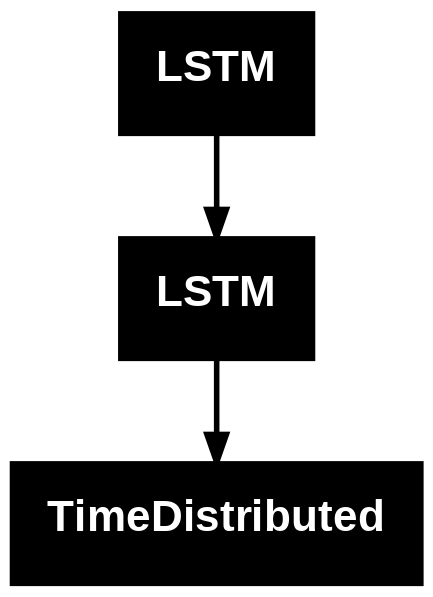

In [37]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mse(Y_true[:, -1], Y_pred[:, -1])
#-------------------------------------------------------------------------------
# definimos el modelo secuencial con 2 capas LSTM-------------------------------
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.summary()
tf.keras.utils.plot_model(model)

In [38]:
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
#-------------------------------------------------------------------------------
# entrenamos y validamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - last_time_step_mse: 0.0885 - loss: 0.0986 - val_last_time_step_mse: 0.0352 - val_loss: 0.0546
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - last_time_step_mse: 0.0310 - loss: 0.0502 - val_last_time_step_mse: 0.0184 - val_loss: 0.0404
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - last_time_step_mse: 0.0173 - loss: 0.0383 - val_last_time_step_mse: 0.0144 - val_loss: 0.0352
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - last_time_step_mse: 0.0144 - loss: 0.0342 - val_last_time_step_mse: 0.0129 - val_loss: 0.0324
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - last_time_step_mse: 0.0130 - loss: 0.0319 - val_last_time_step_mse: 0.0118 - val_loss: 0.0306
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - last_time_step_mse: 0.0120 - loss: 0.0303 - val_last_time_step_mse: 0.0111 - val_loss: 0.0292
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - last_time_step_mse: 0.0112 - loss: 0.0291 - val_las

In [39]:
#-------------------------------------------------------------------------------
# evaluamos el modelo sobre los datos de Valid----------------------------------
model.evaluate(X_test, Y_test)
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - last_time_step_mse: 0.0084 - loss: 0.0231


[0.023286418989300728, 0.008031930774450302]

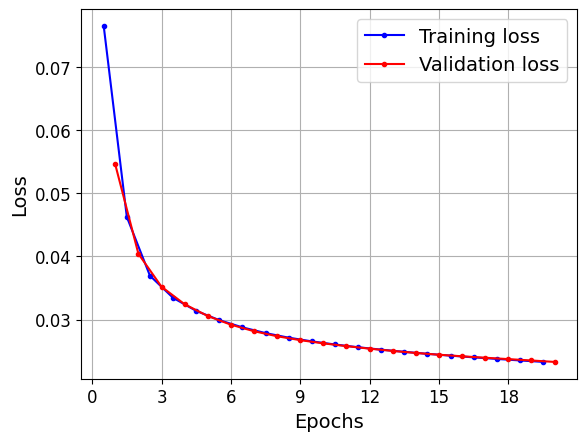

In [40]:
#-------------------------------------------------------------------------------
# observamos las curvas de aprendizaje del modelo-------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [41]:
#-------------------------------------------------------------------------------
# generamos una nueva serie de tiempo para testear el modelo--------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva sample--------------------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
#-------------------------------------------------------------------------------
# realizamos predicción---------------------------------------------------------
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
#-------------------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


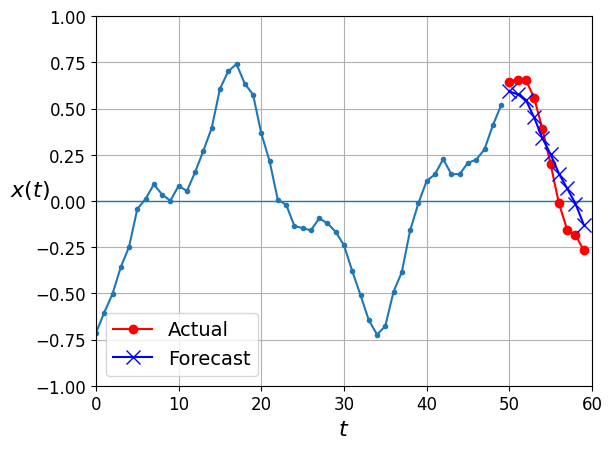

In [42]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- Rendimientos similares a las RNN con horizonte lejano.
- Es preciso sintonizar número de capas e hiperparámetros para aprovechar todas las ventajas de LSTM.

In [43]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

1.6137716 %


# [GRU](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be): Gated Recurrent Unit

- La GRU puede entenderse como una extensión de la capa LSTM para evitar problemas de convergencia en el gradiente.

$$\mathbf{R}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xr}+\mathbf{H}_{t-1}\mathbf{W}_{hr}+\mathbf{b}_r\right)$$
$$\mathbf{Z}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xz}+\mathbf{H}_{t-1}\mathbf{W}_{hz}+\mathbf{b}_z\right)$$
$$\tilde{\mathbf{H}}_t = \tanh(\mathbf{X}_t\mathbf{W}_{xh}+(\mathbf{R}_t\odot\mathbf{H}_{t-1})\mathbf{W}_{hh}+\mathbf{b}_h)$$
$${\mathbf{H}}_t = \mathbf{Z}_t\odot\mathbf{H}_{t-1}+(1-\mathbf{Z}_t)\odot\tilde{\mathbf{H}}_t$$

donde $\mathbf{W}_{xh},\mathbf{W}_{xz},\mathbf{W}_{xh}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hr},\mathbf{W}_{hz},\mathbf{W}_{hh}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{r},\mathbf{b}_{z},\mathbf{b}_{h}\in\mathbb{R}^{h}$.

![gru](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/gru.png?raw=1)

- Si las entradas de $\mathbf{R}_t$ se acercan a 1, el modelo se convierte en una RNN simple. Para valores en $\mathbf{R}_t$ cercanos a 0, el estado oculto "candidato" se cácula como un MLP sobre $\mathbf{X}_t$, cualquier estado oculto anterior es "reseteado".

- Además, si los elementos de la compuerta de actualización $\mathbf{Z}_t$ son cercanos a 1, se mantiene el estado anterior en la capa, de lo contrario el nuevo estado $\mathbf{H}_t$ "acepta" el estado candidato $\tilde{\mathbf{H}}_t.$

- Lo anterior permite mitigar el efecto del desvanecimiento del gradiente de las RNN simples, codificando mejor dependencias en series con relaciones "relativamente grandes" en el tiempo.



In [44]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - last_time_step_mse: 0.0911 - loss: 0.0966 - val_last_time_step_mse: 0.0395 - val_loss: 0.0506
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - last_time_step_mse: 0.0379 - loss: 0.0483 - val_last_time_step_mse: 0.0307 - val_loss: 0.0429
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - last_time_step_mse: 0.0310 - loss: 0.0421 - val_last_time_step_mse: 0.0255 - val_loss: 0.0384
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - last_time_step_mse: 0.0255 - loss: 0.0378 - val_last_time_step_mse: 0.0208 - val_loss: 0.0347
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - last_time_step_mse: 0.0200 - loss: 0.0341 - val_last_time_step_mse: 0.0168 - val_loss: 0.0315
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - last_time_step_mse: 0.0162 - loss: 0.0312 - val_last_time_step_mse: 0.0145 - val_loss: 0.0294
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - last_time_step_mse: 0.0142 - loss: 0.0293 - val_las

In [45]:
model.evaluate(X_valid, Y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - last_time_step_mse: 0.0088 - loss: 0.0228


[0.022834595292806625, 0.008732774294912815]

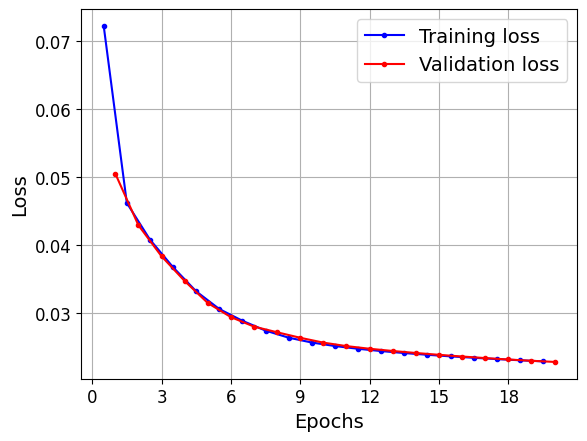

In [46]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [47]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


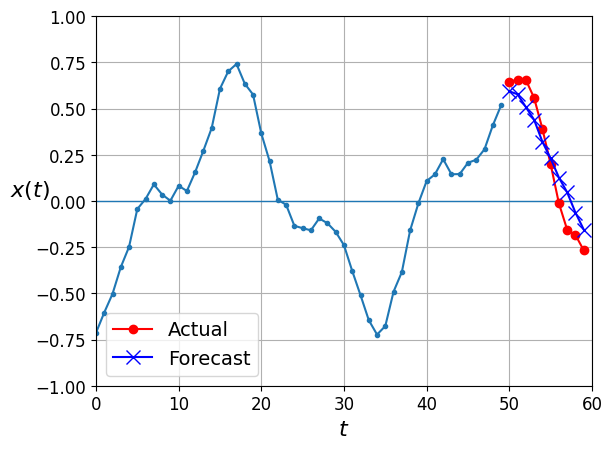

In [48]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [49]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

1.3829362 %


# Ejercicio 3:

- Consulte en qué consisten las capas Conv1D y cómo pueden aplicarse para modelar series temporales (Ver capa [Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/) y [ejemplo](https://boostedml.com/2020/04/1-d-convolutional-neural-networks-for-time-series-basic-intuition.html)).

- Realice una comparación entre las redes tipo RNN simple, LSTM, GRU y Conv1D en terminos de la capacidad de predicción en términos del mse y el mae, en los datos simulados para diferentes horizontes: $\{1,2,3,\dots,15\}$

#Punto 1: Consulte en qué consisten las capas Conv1D y cómo pueden aplicarse para modelar series temporales (Ver capa Conv1D y ejemplo)

La capa Conv1D realiza convoluciones unidimensionales aplicando filtros que recorren una secuencia temporal.
Cada filtro aprende a detectar patrones locales en el tiempo, como tendencias o repeticiones.
Es muy útil para modelar series temporales o señales, ofreciendo una alternativa eficiente a las RNN cuando las dependencias son cortas.
En Keras, se define con parámetros como filters, kernel_size, y activation, y se aplica a entradas de forma (tiempo, características).

##Aplicación a series temporales

Las Conv1D se usan mucho en tareas como:

| Aplicación             | Ejemplo                                              |
| ---------------------- | ---------------------------------------------------- |
| Predicción de series   | Pronóstico de temperatura, demanda, precios          |
| Análisis de señales    | ECG, vibraciones, audio                              |
| Procesamiento de texto | Detección de palabras o patrones locales             |
| Sistemas embebidos     | Señales de sensores (acelerómetros, corriente, etc.) |


##Punto 2: Realice una comparación entre las redes tipo RNN simple, LSTM, GRU y Conv1D en terminos de la capacidad de predicción en términos del mse y el mae, en los datos simulados para diferentes horizontes:  {1,2,3,…,15}

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.15.0

== Horizonte 1 ==


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 SimpleRNN: mse=0.05641, mae=0.19048
 LSTM: mse=0.04884, mae=0.17662
 GRU: mse=0.05590, mae=0.18994
 Conv1D: mse=0.12232, mae=0.28592

== Horizonte 2 ==
 SimpleRNN: mse=0.05825, mae=0.19234
 LSTM: mse=0.05399, mae=0.18478
 GRU: mse=0.05646, mae=0.19047
 Conv1D: mse=0.11594, mae=0.27731

== Horizonte 3 ==
 SimpleRNN: mse=0.06069, mae=0.19604
 LSTM: mse=0.05768, mae=0.19195
 GRU: mse=0.05967, mae=0.19657
 Conv1D: mse=0.11755, mae=0.27912

== Horizonte 4 ==
 SimpleRNN: mse=0.06843, mae=0.21025
 LSTM: mse=0.06149, mae=0.19766
 GRU: mse=0.06172, mae=0.19835
 Conv1D: mse=0.11613, mae=0.27688

== Horizonte 5 ==
 SimpleRNN: mse=0.07037, mae=0.21157
 LSTM: mse=0.05688, mae=0.18993
 GRU: mse=0.06680, mae=0.20687
 Conv1D: mse=0.13188, mae=0.29230

== Horizonte 6 ==
 SimpleRNN: mse=0.07965, mae=0.22351
 LSTM: mse=0.06282, mae=0.19909
 GRU: mse=0.07372, mae=0.21690
 Conv1D: mse=0.12770, mae=0.29072

== Horizonte 7 ==
 SimpleRNN: mse=0.07604, mae=0.22212
 LSTM: mse=0.06453, mae=0.20291
 GRU: mse=0.0

,SimpleRNN_mse,SimpleRNN_mae,LSTM_mse,LSTM_mae,GRU_mse,GRU_mae,Conv1D_mse,Conv1D_mae
horizon,,,,,,,,
1,0.056414,0.190481,0.048836,0.176625,0.055902,0.189936,0.122316,0.285916
2,0.058248,0.192341,0.053991,0.184779,0.056455,0.190470,0.115940,0.277308
3,0.060693,0.196038,0.057683,0.191945,0.059665,0.196568,0.117552,0.279118
4,0.068426,0.210252,0.061487,0.197663,0.061719,0.198351,0.116132,0.276884
5,0.070368,0.211569,0.056883,0.189932,0.066805,0.206866,0.131884,0.292300
6,0.079651,0.223515,0.062825,0.199092,0.073719,0.216898,0.127697,0.290720
7,0.076043,0.222118,0.064526,0.202913,0.093043,0.243068,0.135023,0.298058
8,0.068724,0.210295,0.071170,0.211850,0.100763,0.256334,0.146888,0.310877
9,0.092474,0.245251,0.057368,0.190074,0.094093,0.244022,0.158320,0.320447


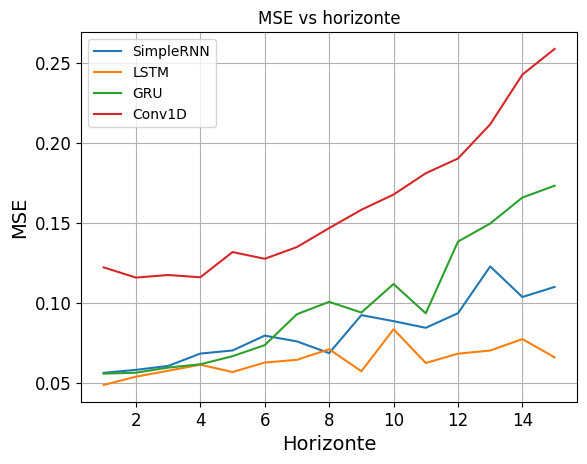

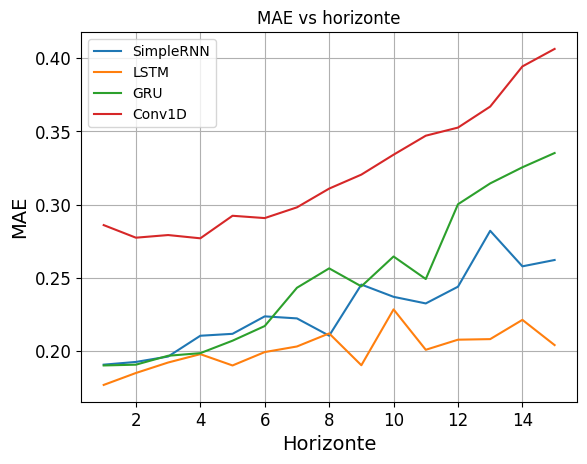

Resultados guardados en: /content/results_rnn_conv1d_comparison.csv


In [50]:
# ==== Código completo: comparación SimpleRNN / LSTM / GRU / Conv1D para horizontes 1..15 ====
# Pegar en Google Colab y ejecutar

# 1) (Opcional en Colab) instalar tf si no está
!pip install -q tensorflow==2.15.0

# 2) imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import os

# reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

# 3) Generar serie sintética
N = 5000
t = np.arange(N)
series = (0.6 * np.sin(0.02 * t) +
          0.3 * np.sin(0.05 * t + 0.5) +
          0.2 * np.sin(0.15 * t + 1.2) +
          0.1 * np.random.randn(N))
series = (series - series.mean()) / series.std()

# parámetros
window_size = 50
horizons = list(range(1, 16))  # 1..15
test_size = 0.2

def create_dataset(series, window_size, h):
    X = []
    y = []
    max_i = len(series) - window_size - h + 1
    for i in range(max_i):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size+h-1])
    X = np.array(X)[:, :, np.newaxis]  # (samples, window_size, 1)
    y = np.array(y)
    return X, y

# funciones constructoras de modelos
def build_simple_rnn(input_shape):
    model = keras.Sequential([
        layers.SimpleRNN(32, activation='tanh', input_shape=input_shape),
        layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

def build_lstm(input_shape):
    model = keras.Sequential([
        layers.LSTM(32, input_shape=input_shape),
        layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

def build_gru(input_shape):
    model = keras.Sequential([
        layers.GRU(32, input_shape=input_shape),
        layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

def build_conv1d(input_shape):
    model = keras.Sequential([
        layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=input_shape),
        layers.GlobalAveragePooling1D(),
        layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

# loop de entrenamiento por horizonte
results = []
start_time = time.time()

for h in horizons:
    print(f"\n== Horizonte {h} ==")
    X, y = create_dataset(series, window_size, h)
    # train/test split (no shuffle)
    split_idx = int((1 - test_size) * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    input_shape = X_train.shape[1:]

    epochs = 25
    batch_size = 64
    verbose = 0

    models = {
        'SimpleRNN': build_simple_rnn(input_shape),
        'LSTM': build_lstm(input_shape),
        'GRU': build_gru(input_shape),
        'Conv1D': build_conv1d(input_shape)
    }

    metrics_h = {'horizon': h}
    for name, m in models.items():
        # EarlyStopping para evitar sobreentrenamiento
        es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
        history = m.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_split=0.1, callbacks=[es], verbose=verbose)
        eval_res = m.evaluate(X_test, y_test, verbose=0)
        metrics_h[f'{name}_mse'] = float(eval_res[0])
        metrics_h[f'{name}_mae'] = float(eval_res[1])
        print(f" {name}: mse={metrics_h[f'{name}_mse']:.5f}, mae={metrics_h[f'{name}_mae']:.5f}")
    results.append(metrics_h)

elapsed = time.time() - start_time
print(f"\nTiempo total: {elapsed:.1f} s")

df = pd.DataFrame(results).set_index('horizon')
display(df)

# graficar MSE y MAE por horizonte
plt.figure()
for col in df.columns:
    if col.endswith('_mse'):
        model_name = col.replace('_mse','')
        plt.plot(df.index, df[col], label=model_name)
plt.title('MSE vs horizonte')
plt.xlabel('Horizonte')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
for col in df.columns:
    if col.endswith('_mae'):
        model_name = col.replace('_mae','')
        plt.plot(df.index, df[col], label=model_name)
plt.title('MAE vs horizonte')
plt.xlabel('Horizonte')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

# guardar resultados
out_path = '/content/results_rnn_conv1d_comparison.csv'
df.to_csv(out_path)
print(f"Resultados guardados en: {out_path}")
